# Let's try to do this shit


In [69]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data_clean/processed_data_with_features.csv')

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,Wednesday,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,Wednesday,9,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,Wednesday,9,0.006524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,Wednesday,10,-0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,Wednesday,10,0.009588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157


In [70]:
# Define a mapping from day name to number (e.g., Monday=0, ..., Sunday=6)
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Apply the mapping to the column
df['DAY_OF_THE_WEEK'] = df['DAY_OF_THE_WEEK'].map(day_map)

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,2,9,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,2,9,0.006524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,2,10,-0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,2,10,0.009588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157


In [71]:
# First, compute the new columns
df['NEXT_LOG_RETURN'] = df.groupby('SYMBOL')['LOG_RETURN'].shift(-1)
df['NEXT_DIRECTION'] = np.where(df['NEXT_LOG_RETURN'] > 0, 1,
                         np.where(df['NEXT_LOG_RETURN'] < 0, -1, 0))

# Get the index of 'LOG_RETURNS' to insert after it
log_ret_idx = df.columns.get_loc('LOG_RETURN')

# Remove the new columns from the end if already appended
next_return = df.pop('NEXT_LOG_RETURN')
next_direction = df.pop('NEXT_DIRECTION')

# Insert them right after 'LOG_RETURNS'
df.insert(log_ret_idx + 1, 'NEXT_LOG_RETURN', next_return)
df.insert(log_ret_idx + 2, 'NEXT_DIRECTION', next_direction)

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,2,9,NaN,-0.011233,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,2,9,-0.011233,0.006524,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,2,9,0.006524,-0.006391,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,2,10,-0.006391,0.009588,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,2,10,0.009588,-0.001119,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157


In [72]:
columns = [col for col in df.columns if not col.startswith(('zscore', 'ema')) and not col in ['DATE_FORMATTED', 'DATE', 'TIME', 'MID_OPEN']]

df = df[columns].sort_values(by='DATETIME').dropna()

df.head()

,SYMBOL,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,macd,macd_signal,macd_hist
89298,CRWD,2021-12-02 13:10:00,3,13,-0.011525,-0.005318,-1,0.006909,-0.000652,-0.094328,-1.175062,0.812262,-0.011525,0.005194,-0.003259,-0.002925,0.013167,-0.014470,-0.011165,0.005925,0.000094,0.015804,-1.115465,0.255164,-0.011525,0.006278,0.000936,-0.000717,0.011944,-0.011757,-0.023418,0.005470,0.001088,0.198940,-1.271007,1.120422,-0.011525,0.007330,0.015235,-0.000148,0.012029,-0.009852,-0.030302,0.007098,0.001087,0.153121,-0.500572,0.045957,-0.012933,0.014947,0.021738,0.000116,0.015284,-0.013110,-0.035577,0.009220,0.000509,0.055190,-0.527632,1.629234,-0.026575,0.020941,0.016284,-0.000184,0.018949,-0.017932,-0.050976,0.008709,-0.000098,-0.011304,-0.284465,1.169093,-0.026575,0.020941,-0.004430,-0.000998,0.017319,-0.017516,-0.050976,0.008084,-0.001020,-0.126150,-0.106643,1.272085,-0.026575,0.020941,-0.061185,-0.002088,0.015148,-0.017187,-0.094275,0.924344,0.536478,0.387866
168716,HBAN,2021-12-02 13:10:00,3,13,0.001319,0.001317,1,0.000861,0.000792,0.920447,0.542438,-1.477735,0.000000,0.001982,0.003962,0.000962,0.002514,-0.000929,-0.002639,0.002552,0.000927,0.363140,0.094043,2.165662,-0.003999,0.005992,0.009269,0.000985,0.006032,-0.004178,-0.011877,0.002478,0.001234,0.498241,0.000066,0.895077,-0.003999,0.005992,0.017282,0.000949,0.006190,-0.003721,-0.015836,0.002831,0.000998,0.352654,-0.211899,-0.038466,-0.004692,0.005992,0.019967,0.000823,0.006660,-0.004664,-0.019136,0.003281,0.000561,0.171008,-0.092731,-0.698888,-0.005733,0.006069,0.017953,0.000468,0.007122,-0.006000,-0.027054,0.003461,0.000044,0.012707,-0.079304,-0.751136,-0.007338,0.006069,0.001979,0.000046,0.006966,-0.006878,-0.032163,0.003502,-0.000115,-0.032820,-0.091153,-0.749223,-0.007338,0.006069,-0.006895,-0.000417,0.006888,-0.007118,-0.042843,0.051568,0.029152,0.022416
134440,ETR,2021-12-02 13:10:00,3,13,-0.000194,0.000437,1,0.001827,0.000282,0.154450,1.765646,3.470966,-0.001267,0.003409,0.001411,0.000506,0.003937,-0.003372,-0.003549,0.001811,0.000962,0.531350,0.384797,-1.518234,-0.001267,0.003617,0.009625,0.000595,0.004585,-0.002660,-0.009771,0.001892,0.000691,0.365293,0.160095,-1.332448,-0.001909,0.003617,0.009674,0.000578,0.004474,-0.003092,-0.009820,0.002106,0.000683,0.324221,0.148073,-1.207660,-0.002793,0.004083,0.013658,0.000519,0.004896,-0.003530,-0.013757,0.002263,0.000370,0.163414,0.327322,-0.559907,-0.003755,0.005332,0.011836,0.000406,0.004897,-0.004157,-0.018035,0.002142,0.000040,0.018685,0.381777,-0.082237,-0.004259,0.005332,0.001801,0.000322,0.004323,-0.004243,-0.018035,0.002289,0.000246,0.107334,0.822290,1.685434,-0.004259,0.008379,0.014743,0.000256,0.004824,-0.004333,-0.018035,0.255732,0.178503,0.077229
170388,HD,2021-12-02 13:10:00,3,13,-0.001574,0.001672,1,0.001302,0.000262,0.200889,-0.444821,-0.648788,-0.001574,0.001720,0.001308,-0.000124,0.002865,-0.002342,-0.003194,0.001493,0.000417,0.279604,-1.057781,0.176480,-0.002530,0.001965,0.004174,0.000268,0.003403,-0.002568,-0.008558,0.001980,0.000795,0.401471,0.330278,-0.034309,-0.002530,0.004578,0.011127,0.000356,0.004754,-0.003165,-0.012934,0.002402,0.000619,0.257642,-0.088271,-0.434343,-0.004085,0.004578,0.012375,0.000381,0.005422,-0.004185,-0.014202,0.002775,0.000284,0.102397,0.456

In [73]:
def time_split(df, train_ratio=0.8):
    split_point = int(len(df) * train_ratio)
    df = df.sort_values('DATETIME')
    train_df = df.iloc[:split_point].copy()
    test_df = df.iloc[split_point:].copy()
    return train_df, test_df

def compute_groupwise_stats(train_df, group_col, feature_cols):
    stats = train_df.groupby(group_col)[feature_cols].agg(['mean', 'std'])
    # Flatten MultiIndex columns
    stats.columns = ['_'.join(col) for col in stats.columns]
    return stats

def apply_groupwise_standardization(df, stats, group_col, feature_cols):
    df = df.copy()
    for feature in feature_cols:
        mean_col = f"{feature}_mean"
        std_col = f"{feature}_std"
        df = df.merge(stats[[mean_col, std_col]], left_on=group_col, right_index=True, how='left')
        df[feature] = (df[feature] - df[mean_col]) / (df[std_col] + 1e-8)  # avoid div by 0
        df.drop(columns=[mean_col, std_col], inplace=True)
    return df


def compute_sharpe_ratio(returns, periods_per_year=24*365):
    return np.sqrt(periods_per_year) * returns.mean() / returns.std()

def compute_max_drawdown(cum_returns):
    return (cum_returns / cum_returns.cummax() - 1).min()

In [74]:
non_feature_cols = ['SYMBOL', 'MID_OPEN', 'DATETIME', 'DAY_OF_THE_WEEK', 'HOUR_OF_DAY', 'TARGET', 'LOG_RETURN', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION']  # adjust as needed
feature_cols = [col for col in df.columns if col not in non_feature_cols]


train_df, test_df = time_split(df, train_ratio=0.7)

stats = compute_groupwise_stats(train_df, group_col='SYMBOL', feature_cols=feature_cols)


train_df = apply_groupwise_standardization(train_df, stats, group_col='SYMBOL', feature_cols=feature_cols)
test_df = apply_groupwise_standardization(test_df, stats, group_col='SYMBOL', feature_cols=feature_cols)

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# ==== Select features and target ====
selected_features = [col for col in df.columns if col not in ['SYMBOL', 'DATETIME', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION']]
target_col = 'NEXT_DIRECTION'

# ==== Prepare data ====
X_train = train_df[selected_features].values
y_train = ((train_df[target_col].values > 0).astype(int))  # convert -1/1 to 0/1

X_test = test_df[selected_features].values
y_test = ((test_df[target_col].values > 0).astype(int))  # convert -1/1 to 0/1

Iteration 1, loss = 0.69407374
Validation score: 0.537474
Iteration 2, loss = 0.68595524
Validation score: 0.549457
Iteration 3, loss = 0.68340918
Validation score: 0.560087
Iteration 4, loss = 0.68083203
Validation score: 0.561169
Iteration 5, loss = 0.67865461
Validation score: 0.557729
Iteration 6, loss = 0.67699677
Validation score: 0.568629
Iteration 7, loss = 0.67583143
Validation score: 0.565846
Iteration 8, loss = 0.67382131
Validation score: 0.570484
Iteration 9, loss = 0.67238839
Validation score: 0.570407
Iteration 10, loss = 0.67056025
Validation score: 0.568822
Iteration 11, loss = 0.66921158
Validation score: 0.570330
Iteration 12, loss = 0.66772136
Validation score: 0.573229
Iteration 13, loss = 0.66631044
Validation score: 0.573847
Iteration 14, loss = 0.66469024
Validation score: 0.575123
Iteration 15, loss = 0.66360054
Validation score: 0.575045
Iteration 16, loss = 0.66212241
Validation score: 0.573499
Iteration 17, loss = 0.66079665
Validation score: 0.577828
Iterat

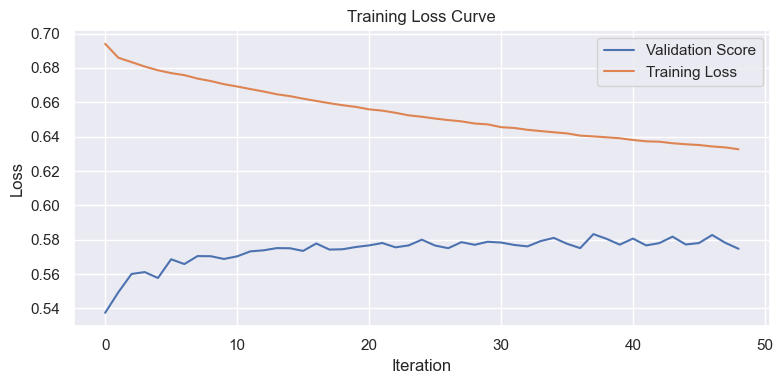


Test Accuracy: 0.5082
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.69      0.58     54162
           1       0.53      0.34      0.41     56713

    accuracy                           0.51    110875
   macro avg       0.51      0.51      0.49    110875
weighted avg       0.51      0.51      0.49    110875



In [80]:
# ==== Define Neural Network ====
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    max_iter=50,
    batch_size=512,
    random_state=42,
    early_stopping=True,
    verbose=True
)

# ==== Train model ====
mlp.fit(X_train, y_train)

# ==== Plot Training Loss Curve ====
plt.figure(figsize=(8, 4))
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==== Evaluate ====
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

test_df['PREDICTION'] = y_pred

result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION', 'DAY_OF_THE_WEEK', 'HOUR_OF_DAY']].set_index(['DATETIME'])

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])


Sharpe Ratio (Strategy): 0.3188
Max Drawdown (Strategy): -0.9559


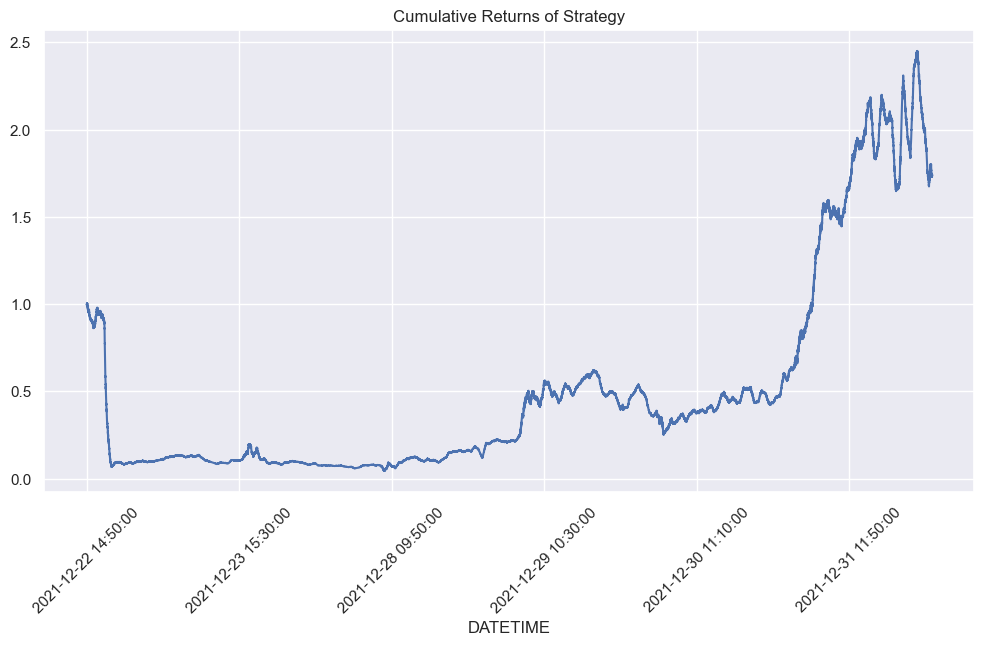

In [ ]:
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

In [79]:
result_df

,SYMBOL,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,PREDICTION,NEXT_RETURN,ret_strategy,cumprod_strategy
DATETIME,,,,,,,,
2021-12-22 14:50:00,MNST,0.000268,0.000697,1,-1,0.000698,-0.000698,0.999302
2021-12-22 14:50:00,AMD,0.002102,0.002551,1,-1,0.002554,-0.002554,0.996750
2021-12-22 14:50:00,APTV,-0.000217,0.000899,1,-1,0.000899,-0.000899,0.995854
2021-12-22 14:50:00,ETR,-0.000457,0.000822,1,1,0.000823,0.000823,0.996673
2021-12-22 14:50:00,BLDR,0.001420,-0.000741,-1,-1,-0.000740,0.000740,0.997411
...,...,...,...,...,...,...,...,...
2021-12-31 15:30:00,PCAR,0.001074,0.000282,1,-1,0.000283,-0.000283,1.735711
2021-12-31 15:30:00,PAYX,0.000109,-0.000767,-1,-1,-0.000766,0.000766,1.737041
2021-12-31 15:30:00,JNPR,0.001683,0.000560,1,-1,0.000561,-0.000561,1.736067
